<a href="https://colab.research.google.com/github/soohyeony/data_analysis/blob/main/%5Bpaper1%5D1_EDA%EB%B0%8F%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%ED%95%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,050 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumBarunGothic') 

### 1. 데이터 불러오기

In [ ]:
raw = pd.read_csv("paper1.csv", header=0, index_col=0)
raw

,C,Si,Mn,P,Ni,Cr,Mo,Mn/S,CR,TT,YS,UTS,EL,RA,IS
Sl. No.,,,,,,,,,,,,,,,
1,0.32,0.23,1.28,0.028,0.85,0.46,0.16,38,38,580,934,1019,18.0,54.0,35
2,0.32,0.23,1.28,0.028,0.85,0.46,0.16,38,16,620,736,845,22.0,59.0,42
3,0.33,0.19,1.45,0.026,0.89,0.56,0.12,73,16,605,785,888,21.0,60.0,72
4,0.33,0.19,1.45,0.026,0.89,0.56,0.12,73,7,625,693,824,21.5,57.0,43
5,0.35,0.19,1.50,0.026,0.93,0.57,0.18,75,7,650,681,839,21.5,58.0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,0.42,0.25,1.40,0.033,0.77,0.49,0.18,40,38,620,882,979,18.5,55.0,56
137,0.42,0.25,1.40,0.033,0.77,0.49,0.18,40,38,590,880,985,18.5,50.0,58
138,0.42,0.25,1.40,0.033,0.77,0.49,0.18,40,3,560,858,994,15.0,31.0,30


In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1 to 140
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       140 non-null    float64
 1   Si      140 non-null    float64
 2   Mn      140 non-null    float64
 3   P       140 non-null    float64
 4   Ni      140 non-null    float64
 5   Cr      140 non-null    float64
 6   Mo      140 non-null    float64
 7   Mn/S    140 non-null    int64  
 8   CR      140 non-null    int64  
 9   TT      140 non-null    int64  
 10  YS      140 non-null    int64  
 11  UTS     140 non-null    int64  
 12  EL      140 non-null    float64
 13  RA      140 non-null    float64
 14  IS      140 non-null    int64  
dtypes: float64(9), int64(6)
memory usage: 17.5 KB


In [ ]:
raw.columns

Index(['C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'Mo', 'Mn/S', 'CR', 'TT', 'YS', 'UTS',
       'EL', 'RA', 'IS'],
      dtype='object')

In [ ]:
paper1_desc = raw.describe()
paper1_desc
# paper1_desc.to_csv("paper1_desc.csv")

,C,Si,Mn,P,Ni,Cr,Mo,Mn/S,CR,TT,YS,UTS,EL,RA,IS
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.374929,0.264643,0.984143,0.030721,0.819143,0.437357,0.173500,36.614286,24.850000,589.571429,808.678571,933.300000,21.160714,56.342857,57.564286
std,0.030429,0.045824,0.509700,0.005088,0.129673,0.081423,0.031278,25.803236,27.747299,67.053843,150.265150,127.840768,3.426656,6.460195,21.887288
min,0.320000,0.190000,0.330000,0.020000,0.560000,0.210000,0.110000,8.000000,3.000000,400.000000,543.000000,707.000000,13.000000,31.000000,15.000000
25%,0.350000,0.250000,0.330000,0.030000,0.740000,0.430000,0.150000,8.000000,7.000000,550.000000,692.000000,839.000000,18.500000,52.500000,42.000000
50%,0.360000,0.250000,1.260000,0.032000,0.890000,0.430000,0.160000,40.000000,12.000000,600.000000,789.500000,912.000000,21.000000,57.000000,60.000000
75%,0.400000,0.300000,1.400000,0.034000,0.910000,0.490000,0.200000,49.000000,38.000000,642.500000,914.000000,1019.000000,23.625000,61.500000,75.000000
max,0.440000,0.370000,1.510000,0.038000,1.080000,0.570000,0.250000,86.000000,118.000000,700.000000,1194.000000,1295.000000,29.000000,67.500000,94.000000


### 2. 탐색적 데이터 분석

#### 1) 상관성 분석

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


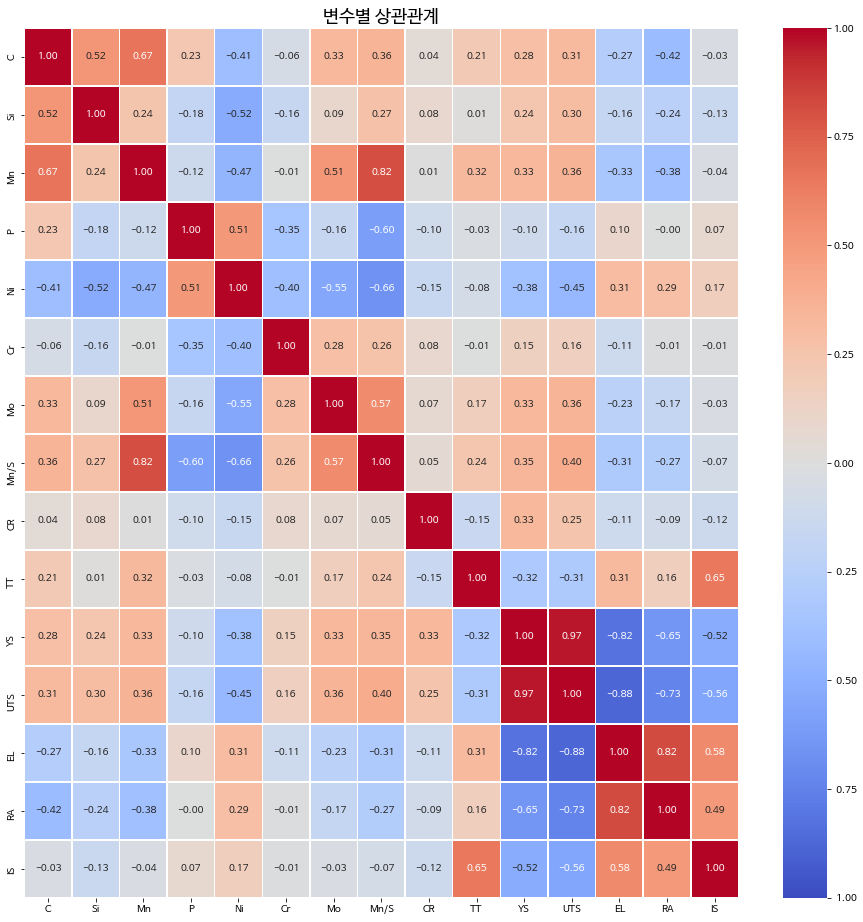

In [ ]:
plt.figure(figsize=(16,16))
plt.title("변수별 상관관계", fontsize=18)
sns.heatmap(data = raw.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='coolwarm',
            vmin = -1, vmax = 1, center = 0)


### 3. Train set, Test set 나누기

- sklearn의 train_test_split() 함수를 사용하여 train set 60%, test set 40%의 비율로 무작위로 섞어서(shuffle=True) 분할

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = raw[['C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'Mo', 'Mn/S', 'CR', 'TT']]
y = raw[['YS', 'UTS', 'EL', 'RA', 'IS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1004)
 
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (98, 10)
X_test shape: (42, 10)
y_train shape: (98, 5)
y_test shape: (42, 5)


In [ ]:
# 데이터셋 저장
paper1_train = pd.concat([X_train,y_train],axis=1)
paper1_train.to_csv('paper1_trainset.csv') # 학습 데이터셋 저장
paper1_test = pd.concat([X_test,y_test],axis=1)
paper1_test.to_csv('paper1_test.csv') # 검증 데이터셋 저장

### 4. actual value, predicted value 평가

In [ ]:
# 예측 데이터 불러오기
res_YS = pd.read_csv("paper1_predicted_YS.csv")
print(res_YS.columns)
res_UTS = pd.read_csv("paper1_predicted_UTS.csv")
print(res_UTS.columns)
res_EL = pd.read_csv("paper1_predicted_EL.csv")
print(res_EL.columns)
res_RA = pd.read_csv("paper1_predicted_RA.csv")
print(res_RA.columns)
res_IS = pd.read_csv("paper1_predicted_IS.csv")
print(res_IS.columns)

Index(['model', 'Sl. No.', 'C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'Mo', 'Mn/S',
       'CR', 'TT', 'YS', 'UTS', 'EL', 'RA', 'IS', '(Predicted) YS'],
      dtype='object')
Index(['model', 'Sl. No.', 'C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'Mo', 'Mn/S',
       'CR', 'TT', 'YS', 'UTS', 'EL', 'RA', 'IS', '(Predicted) UTS'],
      dtype='object')
Index(['model', 'Sl. No.', 'C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'Mo', 'Mn/S',
       'CR', 'TT', 'YS', 'UTS', 'EL', 'RA', 'IS', '(Predicted) EL'],
      dtype='object')
Index(['model', 'Sl. No.', 'C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'Mo', 'Mn/S',
       'CR', 'TT', 'YS', 'UTS', 'EL', 'RA', 'IS', '(Predicted) RA'],
      dtype='object')
Index(['model', 'Sl. No.', 'C', 'Si', 'Mn', 'P', 'Ni', 'Cr', 'Mo', 'Mn/S',
       'CR', 'TT', 'YS', 'UTS', 'EL', 'RA', 'IS', '(Predicted) IS'],
      dtype='object')


In [ ]:
# 'Sl. No.'(row번호)을 기준으로 병합하기

p2total = pd.merge(res_YS,res_UTS[['Sl. No.', '(Predicted) UTS']], how='outer',on='Sl. No.')
p2total = pd.merge(p2total, res_EL[['Sl. No.', '(Predicted) EL']], how='outer',on='Sl. No.')
p2total = pd.merge(p2total ,res_RA[['Sl. No.', '(Predicted) RA']], how='outer',on='Sl. No.')
p2total = pd.merge(p2total ,res_IS[['Sl. No.', '(Predicted) IS']], how='outer',on='Sl. No.')

p2total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            42 non-null     object 
 1   Sl. No.          42 non-null     int64  
 2   C                42 non-null     float64
 3   Si               42 non-null     float64
 4   Mn               42 non-null     float64
 5   P                42 non-null     float64
 6   Ni               42 non-null     float64
 7   Cr               42 non-null     float64
 8   Mo               42 non-null     float64
 9   Mn/S             42 non-null     int64  
 10  CR               42 non-null     int64  
 11  TT               42 non-null     int64  
 12  YS               42 non-null     int64  
 13  UTS              42 non-null     int64  
 14  EL               42 non-null     float64
 15  RA               42 non-null     float64
 16  IS               42 non-null     int64  
 17  (Predicted) YS   4

In [ ]:
p2total.to_csv("paper1_predict.csv")

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

RMSE = mean_squared_error(p2total['YS'], p2total['(Predicted) YS'])**0.5
print('YS의 RMSE: ',RMSE)
print('YS의 MAE: ', mean_absolute_error(p2total['YS'], p2total['(Predicted) YS']))


YS의 RMSE:  105.63507680993486
YS의 MAE:  72.53916553287982


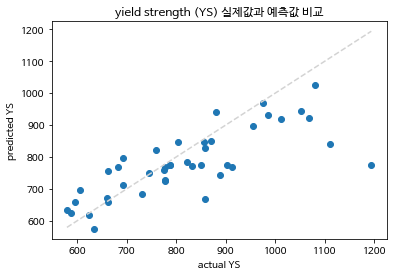

In [ ]:
RMSE = mean_squared_error(p2total['YS'], p2total['(Predicted) YS'])**0.5
print('YS의 RMSE: ',RMSE)
print('YS의 MAE: ', mean_absolute_error(p2total['YS'], p2total['(Predicted) YS']))

x=np.linspace(min(p2total['YS']),max(p2total['YS']), len(p2total['YS']))
y=x
plt.plot(x,y, color='lightgrey', linestyle='--')

plt.scatter(p2total['YS'], p2total['(Predicted) YS'])
plt.title("yield strength (YS) 실제값과 예측값 비교")
plt.xlabel("actual YS")
plt.ylabel("predicted YS")
plt.show()

ultimate tensile strength(UTS)의 RMSE:  89.5358706170518
MAE:  58.21168253968254


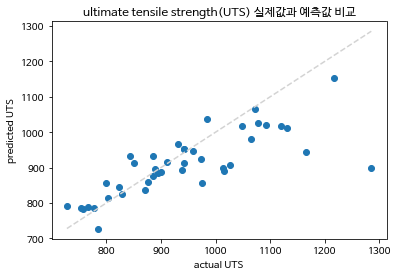

In [ ]:
RMSE = mean_squared_error(p2total['UTS'], p2total['(Predicted) UTS'])**0.5
print('ultimate tensile strength(UTS)의 RMSE: ',RMSE)
print('MAE: ', mean_absolute_error(p2total['UTS'], p2total['(Predicted) UTS']))

x=np.linspace(min(p2total['UTS']),max(p2total['UTS']), len(p2total['UTS']))
y=x
plt.plot(x,y, color='lightgrey', linestyle='--')

plt.scatter(p2total['UTS'], p2total['(Predicted) UTS'])
plt.title("ultimate tensile strength(UTS) 실제값과 예측값 비교")
plt.xlabel("actual UTS")
plt.ylabel("predicted UTS")
plt.show()

% elongation (% EL)의 RMSE:  2.086867357680307
MAE:  1.5413353174603173


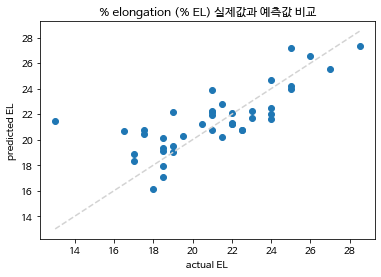

In [ ]:
RMSE = mean_squared_error(p2total['EL'], p2total['(Predicted) EL'])**0.5
print('% elongation (% EL)의 RMSE: ',RMSE)
print('MAE: ', mean_absolute_error(p2total['EL'], p2total['(Predicted) EL']))

x=np.linspace(min(p2total['EL']),max(p2total['EL']), len(p2total['EL']))
y=x
plt.plot(x,y, color='lightgrey', linestyle='--')

plt.scatter(p2total['EL'], p2total['(Predicted) EL'])
plt.title("% elongation (% EL) 실제값과 예측값 비교")
plt.xlabel("actual EL")
plt.ylabel("predicted EL")
plt.show()

% reduction in area (% RA)의 RMSE:  3.583702073312534
MAE:  2.4388730158730163


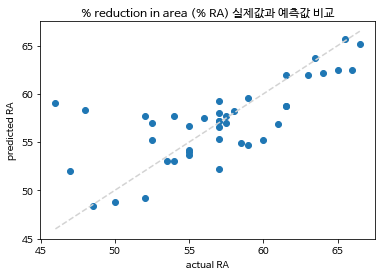

In [ ]:
RMSE = mean_squared_error(p2total['RA'], p2total['(Predicted) RA'])**0.5
print('% reduction in area (% RA)의 RMSE: ',RMSE)
print('MAE: ', mean_absolute_error(p2total['RA'], p2total['(Predicted) RA']))

x=np.linspace(min(p2total['RA']),max(p2total['RA']), len(p2total['RA']))
y=x
plt.plot(x,y, color='lightgrey', linestyle='--')

plt.scatter(p2total['RA'], p2total['(Predicted) RA'])
plt.title("% reduction in area (% RA) 실제값과 예측값 비교")
plt.xlabel("actual RA")
plt.ylabel("predicted RA")
plt.show()

impact strength (IS)의 RMSE:  19.433823876539023
MAE:  13.844787557128798


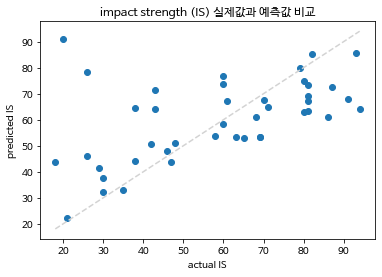

In [ ]:
RMSE = mean_squared_error(p2total['IS'], p2total['(Predicted) IS'])**0.5
print('impact strength (IS)의 RMSE: ',RMSE)
print('MAE: ', mean_absolute_error(p2total['IS'], p2total['(Predicted) IS']))

x=np.linspace(min(p2total['IS']),max(p2total['IS']), len(p2total['IS']))
y=x
plt.plot(x,y, color='lightgrey', linestyle='--')

plt.scatter(p2total['IS'], p2total['(Predicted) IS'])
plt.title("impact strength (IS) 실제값과 예측값 비교")
plt.xlabel("actual IS")
plt.ylabel("predicted IS")
plt.show()